# 1 Часть. Анализ датасета «Social Media and Mental Health Balance» от Ayesha Imran

### Подключаем Numpy, Pandas, импортируем датасет

In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('/kaggle/input/social-media-and-mental-health-balance/Mental_Health_and_Social_Media_Balance_Dataset.csv')

### Предварительный просмотр данных

In [42]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


## Пропусков нет, пустых значений нет, значит датасет потрясающий и его не нужно дополнительно подготавливать

### Теперь посмотрим на распределения числовых переменных

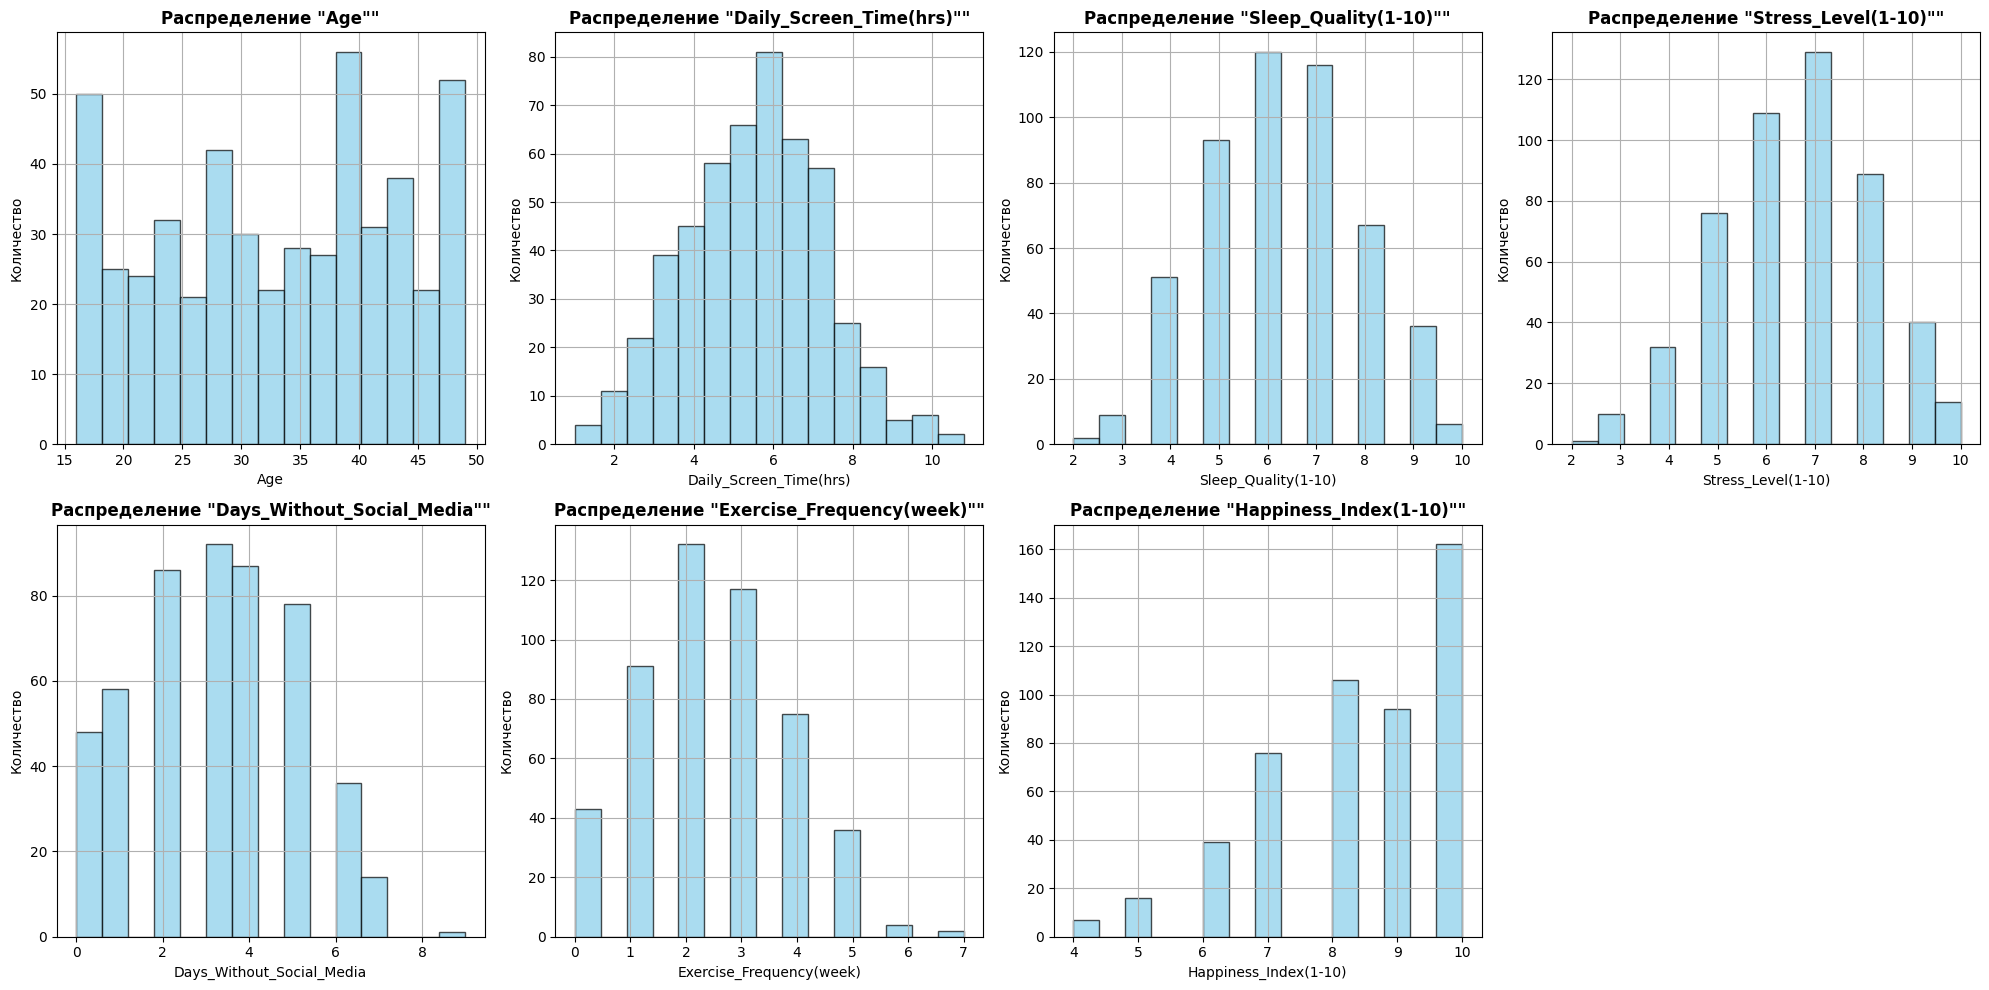

In [44]:
numerical_cols = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
                  'Stress_Level(1-10)', 'Days_Without_Social_Media', 
                  'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

# Создаем подграфики для числовых переменных (2 строки, 4 столбца для размещения всех 7 переменных)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=15, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение "{col}""', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество')

# Удаляем пустой 8-й график
fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

### Теперь можно посмотреть на категориальные данные

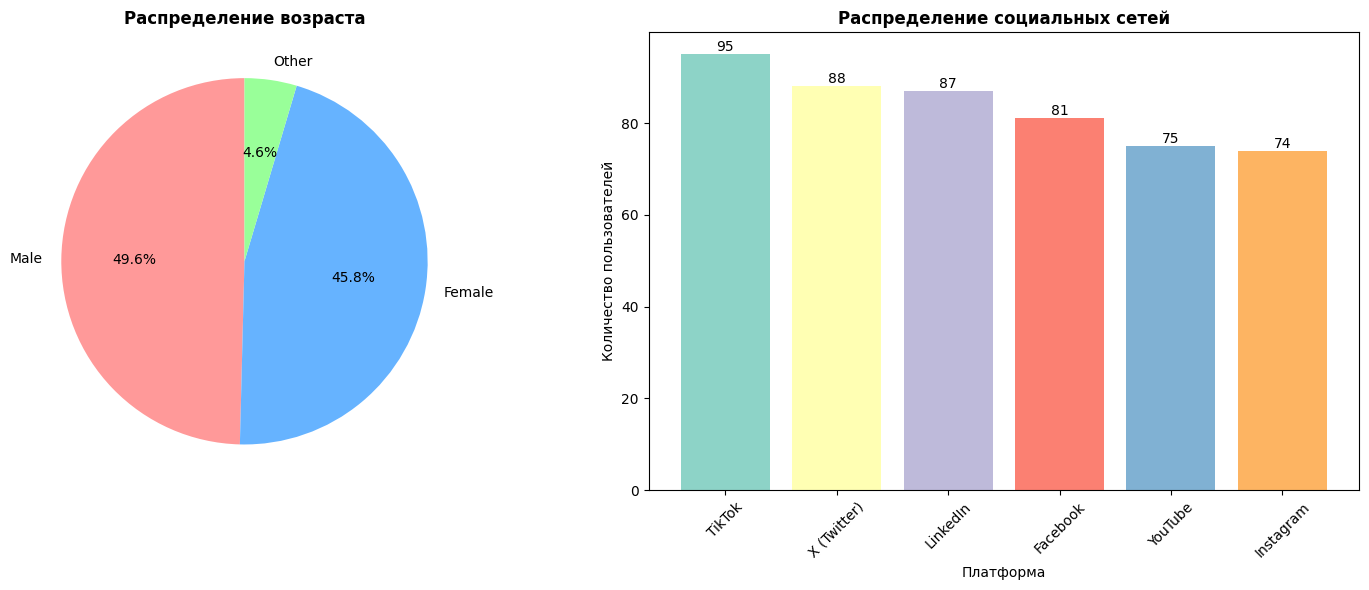

In [45]:
categorical_cols = ['Gender', 'Social_Media_Platform']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Распределение возраста', fontweight='bold')

platform_counts = df['Social_Media_Platform'].value_counts()
bars = axes[1].bar(platform_counts.index, platform_counts.values, 
                   color=plt.cm.Set3(np.arange(len(platform_counts))))
axes[1].set_title('Распределение социальных сетей', fontweight='bold')
axes[1].set_xlabel('Платформа')
axes[1].set_ylabel('Количество пользователей')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Гипотезы:

1 гипотеза: Время, проведённое за экраном, влияет на уровень стресса.

2 гипотеза: Качество сна влияет на уровень счастья.

3 гипотеза: Уровень стресса влияет на уровень счастья

### Проверка гипотез:
Сначала построим матрицу корелляций числовых значений:

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


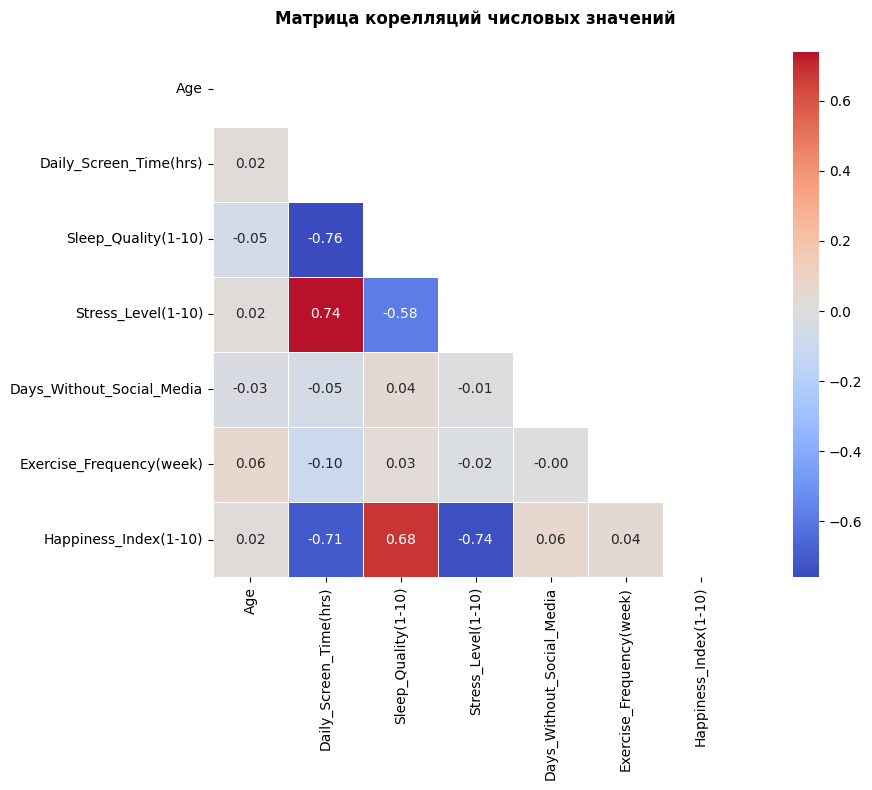

In [46]:
import seaborn as sns

# Матрица корелляций
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Матрица корелляций числовых значений', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Как мы можем заметить, наши гипотезы подтвердились: 

### 1. Время проведенное за экраном прямо пропорционально уровню стресса (0.74)

### 2. Качество сна прямо пропорционально уровню счастья (0.68)

### 3. Уровень стресса обратно пропорционален уровню счастья (-0,74)

## Можем взглянуть на статистические данные некоторых переменных

In [47]:
df['Daily_Screen_Time(hrs)'].describe()

count    500.000000
mean       5.530000
std        1.734877
min        1.000000
25%        4.300000
50%        5.600000
75%        6.700000
max       10.800000
Name: Daily_Screen_Time(hrs), dtype: float64

In [48]:
df['Stress_Level(1-10)'].describe()

count    500.000000
mean       6.618000
std        1.542996
min        2.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Stress_Level(1-10), dtype: float64

In [49]:
df['Happiness_Index(1-10)'].describe()

count    500.000000
mean       8.376000
std        1.524228
min        4.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: Happiness_Index(1-10), dtype: float64